## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math, string, glob
from datetime import datetime
import numpy as np
import functools

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

import tensorflow  as tf
import tensorflow_datasets as tfds
import tensorflow_text as tf_text

import logging
tf.get_logger().setLevel(logging.ERROR)

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

## Komórki rekurencyjne - jednostki w których wartość wyjściowa jest podawana z powrotem na wejście.
Wartości wyjściowe i wejściowe są obliczane w krokach "czasowych".
Wyjście z poprzedniego kroku, `i-1`, jest podawane na wejście w aktualnym kroku, `i`:

![image.png](attachment:051b6b2e-295b-4ef2-a042-f9ac3b62654f.png)

Stan neuronu w kroku `i` jest nazywany zwykle stanem ukrytym, `ang. hidden` i nie musi być tożsamy z wartością wyjściową neuronu.
![image.png](attachment:a3934ea2-5543-4f3f-b70b-7fbca37e2efc.png)

Standardowo sieci rekurencyjne - (ang. `Recurrent Neural Networks, RNN`) przetwarzają sekwencje:

![image.png](attachment:873b5f22-7cd8-4f48-8c3d-06f6a3870e42.png)

Warstwa zawierająca najprostszy wariant: **x = y**  komórki rekurencyjnej, ang. `Recurrent Neural Network cell, RNN cell`
jest zaimplementowana w interfejsie użytkownika Keras jako

```Python
tf.keras.layers.SimpleRNN(
    units,                              # liczba neuronów
    activation='tanh',                  # funkcja aktywacji. W RNN zwykle używa się tanh(x)
    use_bias=True,                      # czy warstwa ma używać wyrazów wolnych?
    kernel_initializer='glorot_uniform',# inicjalizacja wag mieszających składowe stanu wyjściowego i ukrytego
    kernel_regularizer=None,            # regularyzacja wag mieszających składowe stanu wyjściowego i ukrytego
    recurrent_initializer='orthogonal', # inicjalizacja wag mieszających składowe stanu ukrytego
    recurrent_regularizer=None,         # regularyzacja wag mieszających składowe stanu ukrytego
    dropout=0.0,                        # ułamek losowo zerowanych składowych danych wejściowych
    recurrent_dropout=0.0,              # ułamek losowo zerowanych składowych stanu ukrytego
    return_sequences=False,             # czy warstwa ma zwracać sekwencję wartości w kolejnych krokach?
    return_state=False,                 # czy warstwa ma zwracać stan ukryty?
    go_backwards=False,                 # czy warstwa ma przetwarzać sekwencję w odwrotnej kolejności?
)
```

In [2]:
batchSize = 1
nTimeSteps = 3
inputDimension = 2
outputDimension = 2

input = np.random.random((batchSize, nTimeSteps, inputDimension))
simple_rnn = tf.keras.layers.SimpleRNN(outputDimension)
output = simple_rnn(input)
print(colored("RNN cell output:\n","blue"), output)

simple_rnn = tf.keras.layers.SimpleRNN(inputDimension,
                                       return_sequences=True,
                                       return_state=True)
output = simple_rnn(input)
print(colored("RNN cell output:\n","blue"), output)

RNN cell output:
 tf.Tensor([[0.5467158  0.26509348]], shape=(1, 2), dtype=float32)
RNN cell output:
 (<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[ 0.43153927, -0.31700113],
        [ 0.7876455 , -0.5342861 ],
        [ 0.7019853 , -0.848473  ]]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.7019853, -0.848473 ]], dtype=float32)>)


Badanie działania komórki RNN.

**Proszę:**

* przygotować dane wejściowe dla warstwy RNN:
    * jedna paczka
    * sto kroków czasowych
    * kolejne liczby całkowite w każdym kroku: `(0)`, `(1)` itd.

 * wypisać na ekran dane dla pierwszych pięciu kroków i ich kształt.
 * sprawdzić czy kształt jest poprawny: `(batchSize, nSteps, inputDim)`   

In [3]:
batchSize = 1
nTimeSteps = 100
inputDimension = 1

input = np.arange(0, nTimeSteps, 1).reshape(batchSize, nTimeSteps, inputDimension)

print(colored("Input:\n", "green"), input[:,0:5,:])
print(colored("Input shape:\n", "blue"), input.shape)
#print(colored("Full inoput:\n", "red"), input)
pass

Input:
 [[[0]
  [1]
  [2]
  [3]
  [4]]]
Input shape:
 (1, 100, 1)




**Proszę:**

* zaicjializować wagi i stan początkowy tak by komórka RNN zwracała sumę elementów w sekwencji
* uruchomić komórkę na danych z poprzedniego polecenia
* porównać wynik z wartością oczekiwaną

**Wskazówki:**
* użyć funkcji `customInitializer(kernel_matrix)` do inicjializacji wag
* uwaga na funkcję aktywacji


In [4]:
try:
    class customInitializer(tf.keras.Initializer):
        def __init__(self, kernel):
            self.kernel = kernel

        def __call__(self, shape, dtype=None, **kwargs):
            x = tf.reshape(self.kernel, shape)
            x= tf.cast(x, dtype)
            return x
except AttributeError:
    print(colored("tf.keras.Initializer not available","red"))
    print(colored("TF version:","blue"),tf.__version__)
    pass

In [5]:
inputDimension = 1
karnel_matrix = np.diag([1])
recutent_karnel_matrix = np.diag([1])

simple_rnn = tf.keras.layers.SimpleRNN(inputDimension, activation='linear', 
                                       kernel_initializer=customInitializer(karnel_matrix), 
                                       recurrent_initializer=customInitializer(recutent_karnel_matrix),
                                       #return_sequences=True, return_state=True
                                       )

output = simple_rnn(input, initial_state= tf.constant([[0]], dtype=tf.float64))

print(colored("Input:\n", "green"), input[:,0:5,:])
print(colored("Output:\n", "blue"), output)
print(colored("Sequence sum:\n", "red"), np.sum(input, axis=1))

pass


Input:
 [[[0]
  [1]
  [2]
  [3]
  [4]]]
Output:
 tf.Tensor([[4950.]], shape=(1, 1), dtype=float32)
Sequence sum:
 [[4950]]


**Proszę:**

* użyć komórki RNN do generacji liczb z ciągu Fibonacciego:
$$
\huge{
F_{n} = F_{n-1} + F_{n-2}, F_{0} = 0, F_{1} = 1
}
$$

**Wskazówka:**
* komórka powinna przyjmować ciąg dwu poprzednich elementów
* generacja kolejnych elementów powinna się odbywać w pętli
* można użyć funkcji `np.roll(...)` do odpowiedniego ustawiania elementów ciągu podawanych na wejściu:

```Python
x = np.array([0,1])
print(colored("x:","blue"),x)
x = np.roll(x, 1, axis=0)
print(colored("rolled x:","blue"),x)
```

In [6]:
x = np.array([0,1])
print(colored("x:","blue"),x)
x = np.roll(x, 1, axis=0)
print(colored("rolled x:","blue"),x)
#######################################################
#######################################################

nTimeSteps = 2
input = np.arange(0, nTimeSteps, 1).reshape(batchSize, nTimeSteps, inputDimension)

for i in range(0,20):
    output = simple_rnn(input, initial_state= tf.constant([[0]], dtype=tf.float64))
    input = np.roll(input, 1, axis=1)
    input[:,-1,:] = output[0,0]
    print(colored("Fibbonaci number -", 'green'), colored(i+1, 'cyan'), colored(": ", "green"), output[0,0].numpy())
pass


x: [0 1]
rolled x: [1 0]
Fibbonaci number - 1 :  1.0
Fibbonaci number - 2 :  2.0
Fibbonaci number - 3 :  3.0
Fibbonaci number - 4 :  5.0
Fibbonaci number - 5 :  8.0
Fibbonaci number - 6 :  13.0
Fibbonaci number - 7 :  21.0
Fibbonaci number - 8 :  34.0
Fibbonaci number - 9 :  55.0
Fibbonaci number - 10 :  89.0
Fibbonaci number - 11 :  144.0
Fibbonaci number - 12 :  233.0
Fibbonaci number - 13 :  377.0
Fibbonaci number - 14 :  610.0
Fibbonaci number - 15 :  987.0
Fibbonaci number - 16 :  1597.0
Fibbonaci number - 17 :  2584.0
Fibbonaci number - 18 :  4181.0
Fibbonaci number - 19 :  6765.0
Fibbonaci number - 20 :  10946.0


**Proszę:**

* napisać funkcję `generateFibonacci(n)` która generuje pierwszych `n` elementów ciągu Fibonacciego (można napisać standardowy algorytm, bez RNN)
* stworzyć macierz `fib_sequence` zawierającą pierwsze `30` elementów ciągu Fibonacciego - zaczynając od `[1,1,2,...]`
* wypisać na ekran otrzymaną macierz

In [7]:
fib = [1,1]
n=30
def generateFibonacci(n=30):
    while len(fib) < n:
        #print(fib)
        fib.append(fib[-1] + fib[-2])
        yield fib[-1]
        

fib_sequence = np.array([x for x in generateFibonacci()])

print(colored("Fibonacci sequence:\n", "green"), fib)

    
pass

Fibonacci sequence:
 [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040]


**Proszę:**

* podzielić macierz na fragmenty o długości `window_size=6` używając ruchomego okna z krokiem `1`.
* wypisać na ekran otrzymany tensor

**Wskazówka:**

* do podziału listy na fragmenty można użyć funkcji `tf_text.sliding_window`

In [8]:
window_size = 6

slidingWidnowWithWitdh = functools.partial(tf_text.sliding_window, width=window_size)

print(colored("Sliding widnow with witdh:\n", "blue"), slidingWidnowWithWitdh(fib))
pass

Sliding widnow with witdh:
 tf.Tensor(
[[     1      1      2      3      5      8]
 [     1      2      3      5      8     13]
 [     2      3      5      8     13     21]
 [     3      5      8     13     21     34]
 [     5      8     13     21     34     55]
 [     8     13     21     34     55     89]
 [    13     21     34     55     89    144]
 [    21     34     55     89    144    233]
 [    34     55     89    144    233    377]
 [    55     89    144    233    377    610]
 [    89    144    233    377    610    987]
 [   144    233    377    610    987   1597]
 [   233    377    610    987   1597   2584]
 [   377    610    987   1597   2584   4181]
 [   610    987   1597   2584   4181   6765]
 [   987   1597   2584   4181   6765  10946]
 [  1597   2584   4181   6765  10946  17711]
 [  2584   4181   6765  10946  17711  28657]
 [  4181   6765  10946  17711  28657  46368]
 [  6765  10946  17711  28657  46368  75025]
 [ 10946  17711  28657  46368  75025 121393]
 [ 17711  28657 

**Proszę:**

* stworzyć obiekt `tf.data.Dataset` którego elementami są `szóstki` kolejnych elementów ciągu Fibonacciego
* wypisać na ekran pierwsze cztery wiersze danych

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(slidingWidnowWithWitdh(fib))

for item in dataset.take(4):
    print(colored("Features:","blue"), item)
pass

Features: tf.Tensor([1 1 2 3 5 8], shape=(6,), dtype=int32)
Features: tf.Tensor([ 1  2  3  5  8 13], shape=(6,), dtype=int32)
Features: tf.Tensor([ 2  3  5  8 13 21], shape=(6,), dtype=int32)
Features: tf.Tensor([ 3  5  8 13 21 34], shape=(6,), dtype=int32)


**Proszę:**

* przetworzyć wiersze w danych do postaci `(features, label)`  gdzie  `label` to ostatni element grupy, a `features` to pozostałe
* zadbać by cechy miały kształt oczekiwany przez warstwy rekurencyjne: `(nSteps, inputDim)`
* wypisać na ekran pięć przykładów. Sprawdzić czy podizał jest poprawny.

In [10]:
def map_fn(x):
    features = tf.expand_dims(x[:-1], axis=-1) 
    label = x[-1] 
    return features, label

dataset = dataset.map(map_fn).batch(1).cache()

for item in dataset.take(4):
    print(colored("Features:","blue"), item[0].numpy()[0,:,0], end=" ")
    print(colored("Labels:","blue"), item[1].numpy()[0]) 
pass

Features: [1 1 2 3 5] Labels: 8
Features: [1 2 3 5 8] Labels: 13
Features: [ 2  3  5  8 13] Labels: 21
Features: [ 3  5  8 13 21] Labels: 34


2025-05-28 13:46:47.610240: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Model sekwencyjny z komórkami RNN:
```Python
model = tf.keras.Sequential(layers = [tf.keras.layers.InputLayer(shape=(None, 1)),  # kształt danych wejściowych: (liczba kroków, wymiar danych w kroku
        tf.keras.layers.SimpleRNN(nUnits)                                           # liczba kroków nie jest znana z góry, dlatego dajemy None
model.summary()
```

In [11]:
model = tf.keras.Sequential(layers = [tf.keras.layers.InputLayer(shape=(None, 1)),
                                      tf.keras.layers.SimpleRNN(1)])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* zbudować i wytrenować model z komórką `SimpleRNN` który przewidzi następny element ciągu Fibonacciego na podstawie podanego ciągu, niekoniecznie dwuelementowego
* trening powinien zawierać standardopwe elementy: harmonogram funkcji straty, wczesne zatrzymanie, wykres funkcji straty
* jaka funkcja straty będzie dobra dla ciągu którego elementy mają dużą rozpiętość wartości?


**Wskazówki:**
* jaka funkcja aktywacji jest odpowiednia dla wyjścia o wartości nieograniczonej z góry?
* trening może być niestabilny - trzeba go przeprowadzić kilkakrotnie. Rozsądna wartość funkcji straty jest rzędu `1`

Model: "fib_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 197: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.1874


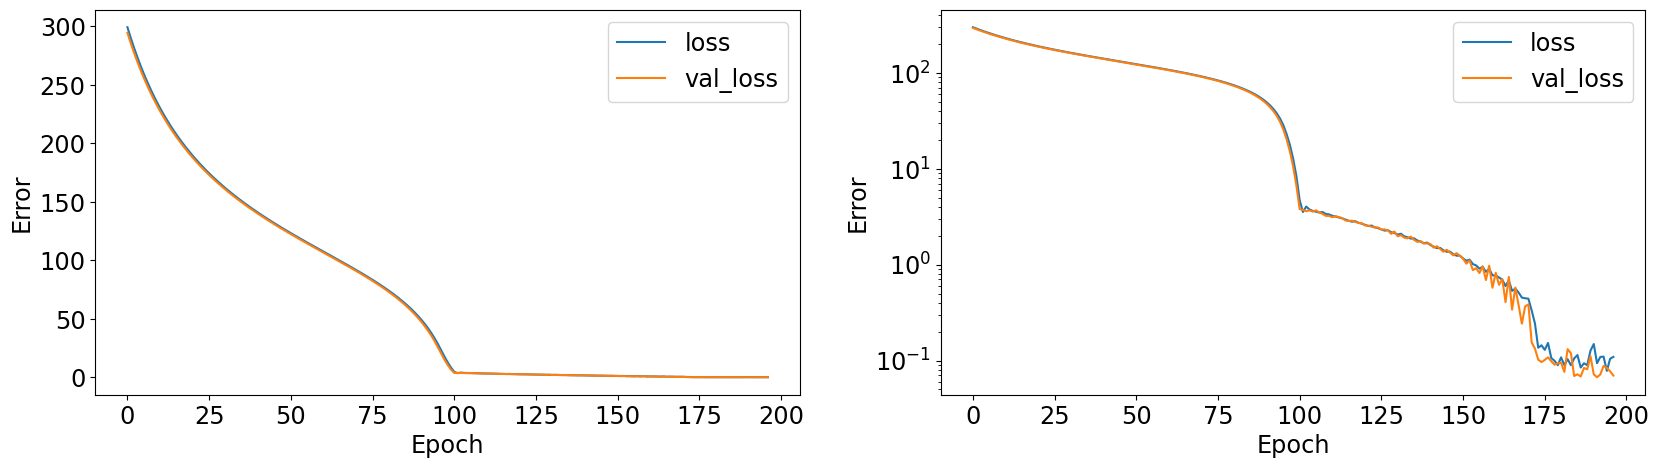

In [19]:
model = tf.keras.Sequential(layers = [tf.keras.layers.InputLayer(shape=(None, 1)),
                                      tf.keras.layers.SimpleRNN(1, activation='linear',
                                                                bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1))],
                                        name="fib_generator")
model.summary()


initial_learning_rate = 1E-3
nStepsPerEpoch = dataset.cardinality().numpy()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*200,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='mape', metrics=[])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       start_from_epoch=15,   
                                                       patience=5, verbose=1)
callbacks = [early_stop_callback]

history = model.fit(dataset,
                    validation_data=dataset,
                    callbacks=callbacks,
                    epochs=1500, verbose=0)
model.evaluate(dataset)
plf.plotTrainHistory(history)
pass

**Proszę:**

* wypisać na ekran wynik działania dla ciągu (sekwencji):
```
data = np.array([[[46368], [75025], [121393], [196418], [317811], [514229]]])
```
* wypisać na ekran wynik działania dla **pięciu ostatnich elementów**
* wypisać na ekran wynik działania dla **dwu ostatnich elementy ciągu**
* we wszystkich przypadkach porównać wynik modelu z wartością oczekiwaną dla elementów ciągu Fibbonaciego

In [21]:
data = np.array([[[46368], [75025], [121393], [196418], [317811], [514229]]])

print(colored("Data:","blue"), data[0,:,0])
print(colored("Prediction:","blue"),model.predict(data)[0,0], end=" ")
print(colored("True value:","blue"),data[0,-1,0]+data[0,-2,0])

print(colored("Data:","blue"), data[0,1:,0])
print(colored("Prediction:","blue"),model.predict(data[:,1:,:])[0,0], end=" ")
print(colored("True value:","blue"),data[0,-1,0]+data[0,-2,0])

print(colored("Data:","blue"), data[0,-2:,0])
print(colored("Prediction:","blue"),model.predict(data[:,-2:,:])[0,0], end=" ")
print(colored("True value:","blue"),data[0,-1,0]+data[0,-2,0])
pass

Data: [ 46368  75025 121393 196418 317811 514229]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 842441.5 True value: 832040
Data: [ 75025 121393 196418 317811 514229]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: 832085.94 True value: 832040
Data: [317811 514229]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: 663468.25 True value: 832040


Komórka RNN ma pewną wadę: wyjście jest średnią ważoną wejścia i stanu z poprzedniego kroku. To oznacza, że dane z odległych kroków w przeszłości mają mały wpływ na stan komórki w bieżącym kroku - **komórka ma jedynie pamięć krótkotrwałą**.

Rozwiązaniem tego problemu jest wyposażenie komórki w dodatkowy stan ukryty, który może przechowywać dane w długim kresie czasu - pamięć długotrwałą. Komórka ma więc dwa rodzaje pamięci - krótko- i długo-trwałą, ang. `Long Short-Term Memory, LSTM`.




![image.png](attachment:1f3ccf4e-54de-4729-ad36-7bdf082c7131.png)

![image.png](attachment:037d00ee-7be7-4e17-8f84-0c5b05ac85f9.png)

![image.png](attachment:8933ecd1-85f2-448f-aacd-402436ff7e03.png)

![image.png](attachment:2967d114-718b-42d8-bd63-0b7519f64328.png)

![image.png](attachment:34e0cfaa-c56d-475c-9684-e8fd6dddd1af.png)

![image.png](attachment:f0e2f9b1-84cb-42c9-8683-b0025c31b167.png)

Implementacja komórki LSTM w Keras:
```Python
tf.keras.layers.LSTMCell(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    seed=None,
    **kwargs
)
```

**Proszę:**

* zbudować i wytrenować model z komórką LSTM który przewidzi następny element ciągu Fibonacciego na podstawie podanego ciągu - niekoniecznie dwuelementowego

**Wskazówki:**
* jak funkcja aktywacji jest odpowiednia dla wyjścia o wartości nieograniczonej z góry?
* trening jest niestabilny - trzeba go przeprowadzić kilkakrotnie

Model: "fib_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 418: early stopping
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.2368


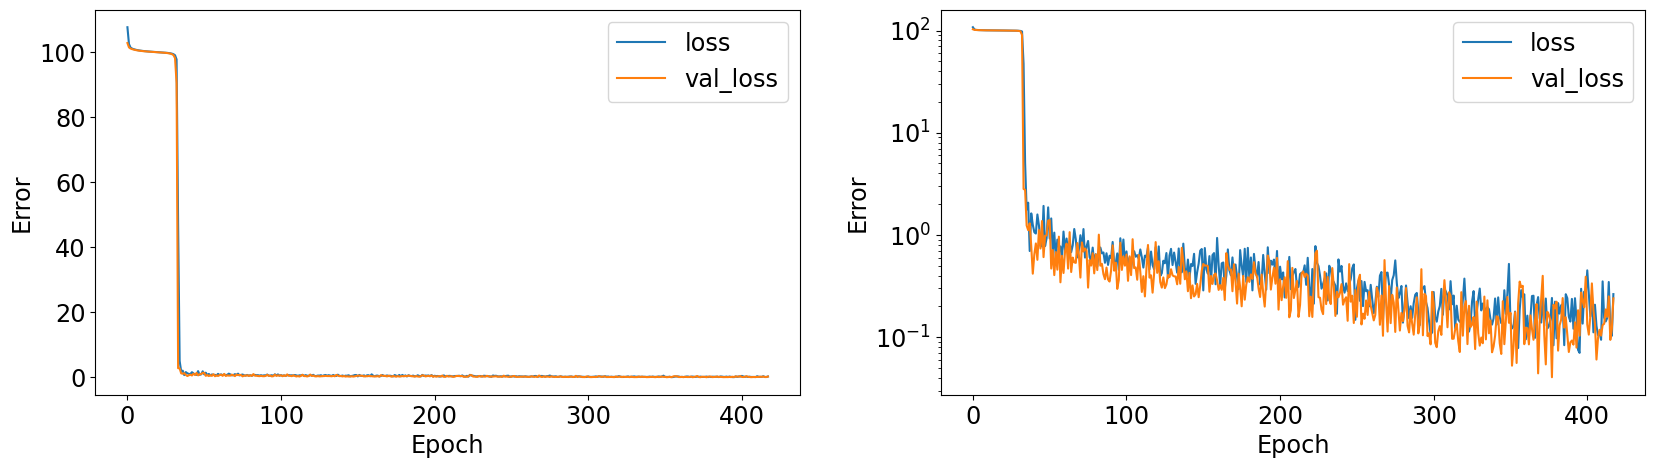

In [26]:
model = tf.keras.Sequential(layers = [tf.keras.layers.InputLayer(shape=(None, 1)),
                                      tf.keras.layers.LSTM(1, activation='linear',
                                                                bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1))],
                                        name="fib_generator")
model.summary()


initial_learning_rate = 5E-3
nStepsPerEpoch = dataset.cardinality().numpy()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*100,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='mape', metrics=[])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       start_from_epoch=15,   
                                                       patience=40, verbose=1)
callbacks = [early_stop_callback]

history = model.fit(dataset,
                    validation_data=dataset,
                    callbacks=callbacks,
                    epochs=1000, verbose=0)
model.evaluate(dataset)
plf.plotTrainHistory(history)
pass

**Proszę:**

* wypisać na ekran etykiety i efekt działania modelu na danych treningowych

In [27]:
predictions = model.predict(dataset)[:,0].astype(int)
labels = fib_sequence[window_size-3:]


for label, prediction in zip(labels, predictions):
    print(colored("Label:","blue"), colored(label, 'cyan'), colored('\t Predictions: ', 'green'), prediction)
pass

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
Label: 8 	 Predictions:  8
Label: 13 	 Predictions:  13
Label: 21 	 Predictions:  21
Label: 34 	 Predictions:  34
Label: 55 	 Predictions:  55
Label: 89 	 Predictions:  89
Label: 144 	 Predictions:  144
Label: 233 	 Predictions:  233
Label: 377 	 Predictions:  378
Label: 610 	 Predictions:  611
Label: 987 	 Predictions:  989
Label: 1597 	 Predictions:  1600
Label: 2584 	 Predictions:  2590
Label: 4181 	 Predictions:  4190
Label: 6765 	 Predictions:  6780
Label: 10946 	 Predictions:  10971
Label: 17711 	 Predictions:  17752
Label: 28657 	 Predictions:  28723
Label: 46368 	 Predictions:  46475
Label: 75025 	 Predictions:  75198
Label: 121393 	 Predictions:  121673
Label: 196418 	 Predictions:  196872
Label: 317811 	 Predictions:  318545
Label: 514229 	 Predictions:  515418
Label: 832040 	 Predictions:  833963


**Proszę:**

* narysować panel z dwoma rysunkami:
   * X=model,  Y=etykieta
   * X=numer elementu, Y=model/etykieta

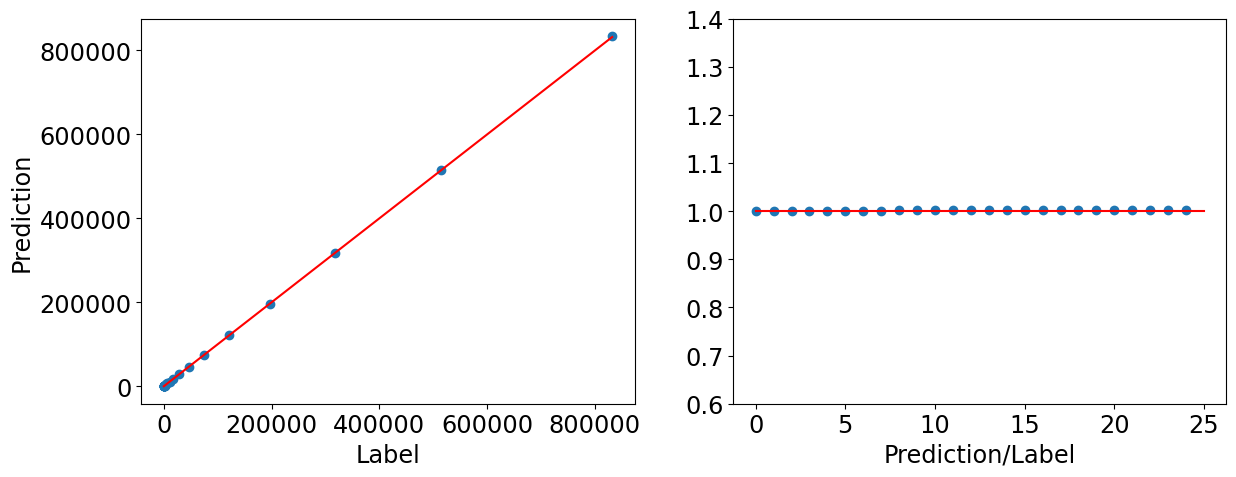

In [28]:
fig, axis = plt.subplots(1, 2, figsize=(14, 5))

axis[0].plot(labels, predictions, 'o')
axis[0].plot(labels, labels, 'r')
axis[0].set_xlabel("Label")
axis[0].set_ylabel("Prediction")

axis[1].plot(predictions/labels, 'o')
axis[1].plot([0,len(labels)], [1,1], 'r')
axis[1].set_xlabel("Prediction/Label")
axis[1].set_ylim([0.6,1.4])
pass

**Proszę:**

* podać na wejście modelu ciąg
```
data = np.array([[[46368], [75025], [121393], [196418], [317811], [514229]]])
```
* podać ten sam ciąg, **pomijając pierwszy element**
* podać **dwa ostatnie elementy ciągu**
* we wszystkich przypadkach porównać wynik modelu z wartością oczekiwaną dla elementów ciągu Fibbonaciego

In [29]:
data = np.array([[[46368], [75025], [121393], [196418], [317811], [514229]]])

print(colored("Data:","blue"), data[0,:,0])
print(colored("Prediction:","blue"),model.predict(data)[0,0], end=" ")
print(colored("True value:","blue"),data[0,-1,0]+data[0,-2,0])

print(colored("Data:","blue"), data[0,1:,0])
print(colored("Prediction:","blue"),model.predict(data[:,1:,:])[0,0], end=" ")
print(colored("True value:","blue"),data[0,-1,0]+data[0,-2,0])

print(colored("Data:","blue"), data[0,-2:,0])
print(colored("Prediction:","blue"),model.predict(data[:,-2:,:])[0,0], end=" ")
print(colored("True value:","blue"),data[0,-1,0]+data[0,-2,0])
pass

Data: [ 46368  75025 121393 196418 317811 514229]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: 837977.0 True value: 832040
Data: [ 75025 121393 196418 317811 514229]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: 833963.9 True value: 832040
Data: [317811 514229]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: 720614.06 True value: 832040


# Zadanie domowe

**Proszę:**

* napisać generator `generateWave()` generującą ciągi liczb `(y)` o losowej długości w zakresie `[10, 100]` elementów
    * wartości `y` to `sin(x)`
    * wartości `x` zaczynają się od losowej liczby w zakresie `[0, $2\pi$]` i zwiększają kolejno o `0.01`
* stworzyć zbiór `tf.data.Dataset` korzystając z  generatora `generateWave()`
* podzielić wiersze zbioru na cechy: `[:-3]` i etykiety: [-1]
* wypisać na ekran pierwsze `5` przykładów
* podzielić zbiór na paczki o rozmiarze dopuszczalnym przez oprogramowanie.
  Napisać komentarz uzasadniający rozmiar paczki
* przygotować `nBatches = 8192` paczek
  

* przeprowadzić trening modelu LSTM przewidującego wartość ostatniego elementu ciągu na podstawie wcześniejszych `[:-3]` elementów sekwensji

* narysować rysunek z trzema polami:
  * prawdziwa wartość: `y`, przewidziana wartość: `y_pred`,
    wartość przed ostatniego elementu zwrócona jako wartość następnego elementu: `y_naive`
  * stosunki `(y-y_pred)/y`, `(y_naive-y)/y` (na jednym rysunku)
  * histogramy `(y-y_pred)/y`, `(y_naive-y)/y` (na jednym rysunku)
* w czasie rysowania zwrócić uwagę na synchronizację elementów `y` i `y_pred`

* `y_pred` obliczyć na podstawie coraz dłuższych sekwencji zawierających wszystkie elementy od wartości `0` to aktualnej wartości `x`, począwszy od sekwencji o długości `1`.

In [18]:
# data generation
nBatches = 8192
batchSize = 1

...rozwiązanie...
pass

SyntaxError: invalid syntax (2372972299.py, line 5)

In [ ]:
%%time
# model definition and training
...rozwiązanie...
pass

In [ ]:
# control plots
...rozwiązanie...
pass